<a href="https://colab.research.google.com/github/samratchakraborty422000/Python-Practice/blob/main/Simple_Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regresssion


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [59]:
#read the daataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

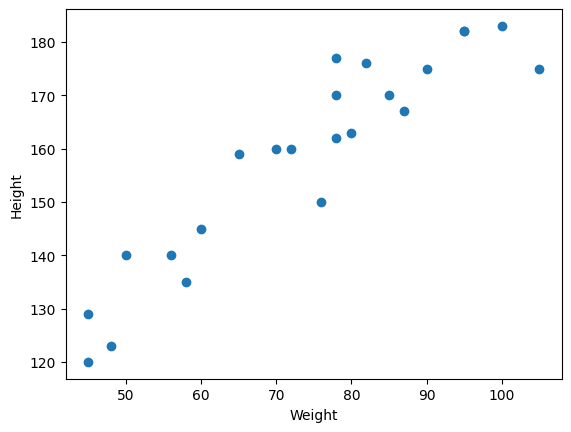

In [60]:
#plotting the simple 2d distribution
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [61]:
#divide the dataset into independent and dependent variable
X=df[['Weight']] #independent
Y=df[['Height']] #dependent

In [62]:
#train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [63]:
X.shape

(23, 1)

In [64]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

In [65]:
#standardise the dataset to Train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

StandardScaler is used in linear regression to standardize features so they have zero mean and unit variance. This ensures that all features contribute equally to the model, preventing bias toward features with larger scales. It also improves numerical stability and speeds up convergence when using gradient descent

In [66]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**fit_transform():**

Learns the parameters (like mean and std in StandardScaler) from the data, and then applies the transformation.Used on the training data.

**transform():**

Only applies the transformation using parameters already learned (from fit).
Used on test or new data to ensure consistent scaling.

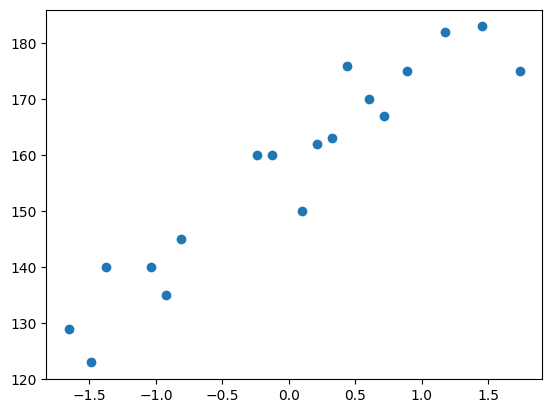

In [67]:
plt.scatter(X_train,Y_train)

In [68]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
#Y=mx+c where c is intercept and m is slope

LinearRegression()

In [69]:
print("The slope or coefficient of weight is: ",regressor.coef_)
print("The Intercept is: ",regressor.intercept_)

The slope or coefficient of weight is:  [[17.03440872]]
The Intercept is:  [157.5]


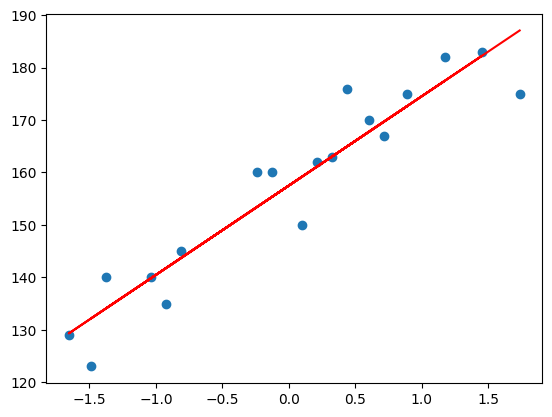

In [70]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

# we are plotting X_train on X axis and on Y axis we are plotting
# the prediction of Y using X_train via our Regressor model


### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [71]:
Y_pred_test=regressor.predict(X_test)

In [72]:
Y_pred_test,Y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

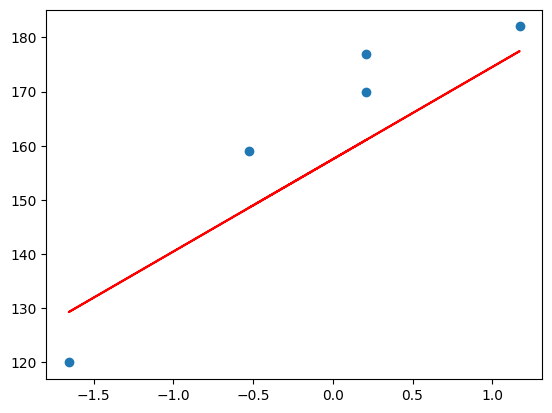

In [73]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

## MSE,MAE,RMSE

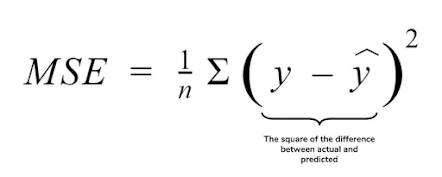


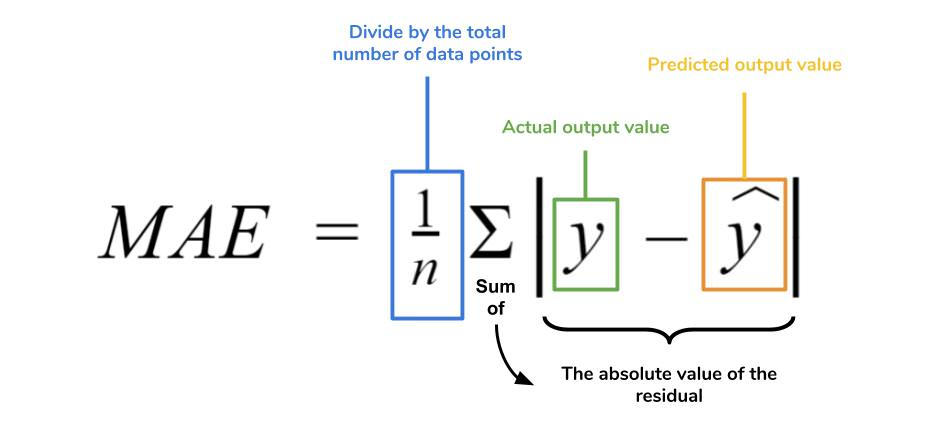

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [75]:
mse=mean_squared_error(Y_test,Y_pred_test)
mae=mean_absolute_error(Y_test,Y_pred_test)
rmse=np.sqrt(mse)
print("mean squared error: ",mse)
print("mean absolute error: ",mae)
print("root mean squared error: ",mse)

mean squared error:  109.77592599051664
mean absolute error:  9.822657814519232
root mean squared error:  109.77592599051664


## R square

Formula

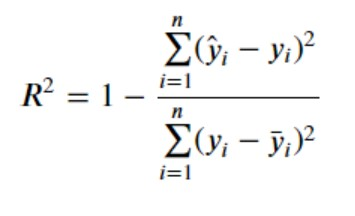


**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination

SSR	=	sum of squares of residuals

SST	=	total sum of squares

In [76]:
from sklearn.metrics import r2_score
r2_score= r2_score(Y_test,Y_pred_test)
print("R squared score: ",r2_score)

R squared score:  0.776986986042344


# Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-p-1)]**

where:

R2: The R2 of the model

n: The number of observations

p: The number of predictor/independent variables


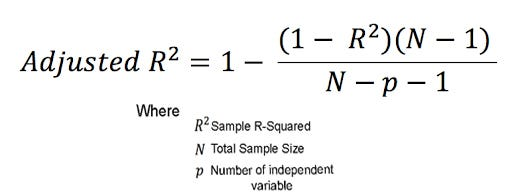

In [77]:
#calculation of adj r2
adj_r_squared=1-(1-r2_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
# X_test.shape will give [row,column] like (5,1) so we need to extract the column number

In [78]:
adj_r_squared

0.7026493147231252

In [79]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

array([[0.32350772]])

In [80]:
scaled_weight[0]

array([0.32350772])

In [81]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [[163.01076266]]


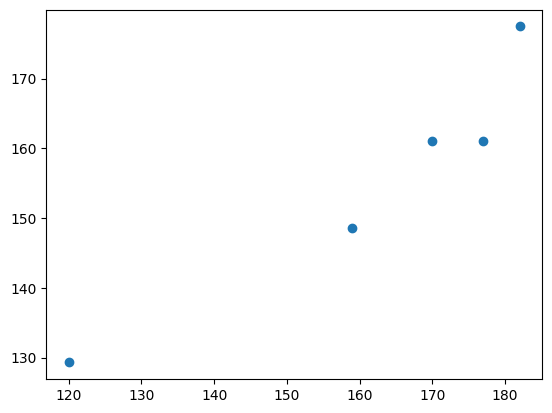

In [82]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(Y_test,Y_pred_test)
# we get a kind of linear distribution

In [83]:
## Residuals
residuals=Y_test-Y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


<Axes: ylabel='Density'>

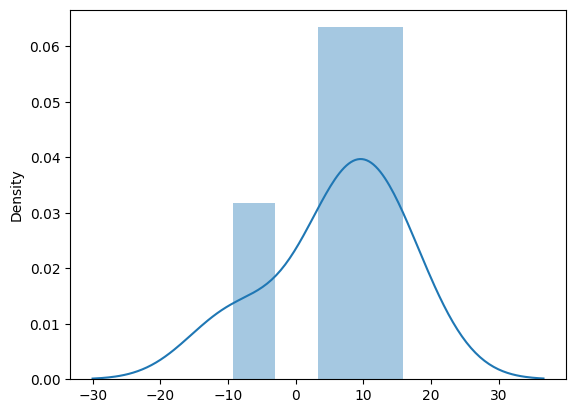

In [84]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

#we should get a kind of normal distribution of residuals